In [ ]:
import numpy as np
from PIL import Image 
from matplotlib import pyplot as plt

: 

In [2]:
def img_save(img_array, file_name, title= '', show = True, cmap=None):
    
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap = cmap)
        plt.title(title)
        plt.show()
    
    plt.imsave(file_name, img_array.astype(np.uint8), cmap = cmap)

In [3]:
def convolution(img_np, gaussian_filter):
    
    X = np.zeros_like(img_np, dtype=np.float32)
    
    for index in range(0,3):
        row = gaussian_filter.shape[0]
        col = gaussian_filter.shape[1]

        Totalrows = img_np[:,:,index].shape[0]
        Totalcols = img_np[:,:,index].shape[1]

        arr = np.zeros((img_np[:,:,index].shape[0], img_np[:,:,index].shape[1]), dtype = np.float32)

        for i in range(row, Totalrows + 1):
            for j in range(col, Totalcols + 1):

                FocussedArray = img_np[:,:,index][range(i-row, i)][:, range(j-col, j)]
#                 print("i-1-row//2:", i-1-row//2)
#                 print("j-1-col//2:", j-1-col//2)
                arr[i-1-row//2][j-1-col//2] = (gaussian_filter*FocussedArray).sum() # because, -1 for index and i and j are the end of the row and col so -row//2 or -col//2 to place it in the middle
#                 print("(gaussian_filter*FocussedArray).sum():", (gaussian_filter*FocussedArray).sum())
        X[:,:,index] = arr
    return X

In [4]:
def createGaussianFilter(sigma):
    
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            gaussian_filter[i, j] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
    return gaussian_filter


# Q1

In [15]:
def GaussianBlurImage(image, sigma):
    ## define Gaussian filter
    G_filter = createGaussianFilter(sigma)

    ## and convolve
    img_blurred = convolution(image, G_filter)

    return img_blurred

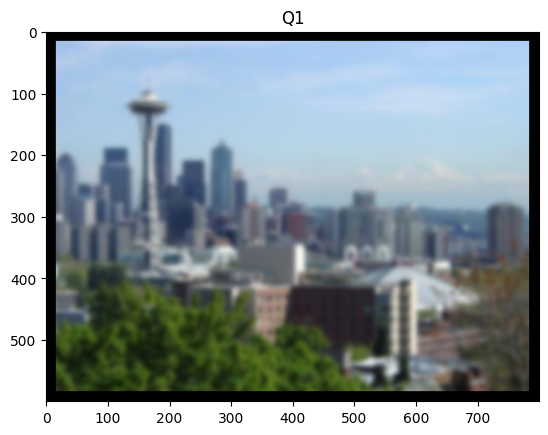

In [16]:
img_seattle = Image.open('Seattle.jpg') 
img_seattle = np.array(img_seattle).astype(np.uint8)
img_1 = GaussianBlurImage(img_seattle, sigma=4.0)
img_save(img_1, '1.png', 'Q1', show = True)

# Q2

In [17]:
def createHorizontalGaussianFilter(sigma):
    
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filterx = np.zeros((filter_size, filter_size), np.float32)
    i = filter_size // 2
    
    x = np.arange(-i, i+1, 1)
   
    gaussian_filterx[i,:] = (1 / (np.sqrt((2 *np.pi * sigma ** 2)))) * np.exp(-(x ** 2)/(2 * sigma ** 2))
    
    return gaussian_filterx

In [18]:
def SeparableGaussianBlurImage(img_np, sigma):

    X = np.zeros_like(img_np)
    Y = np.zeros_like(img_np)

    filter_x = createHorizontalGaussianFilter(sigma)
    filter_y = filter_x.T

    horizontal_img_blur = convolution(img_np, filter_x)
    img_blurred = convolution(horizontal_img_blur, filter_y)

    return img_blurred

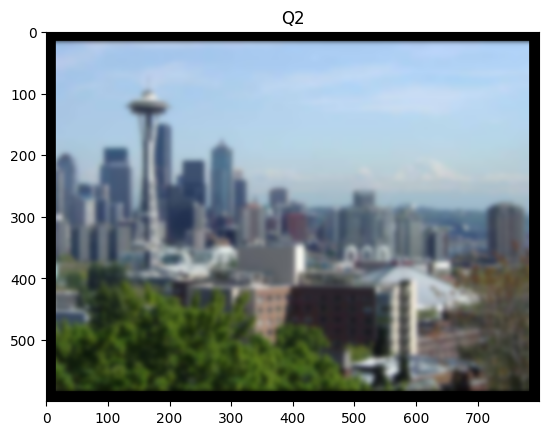

In [19]:
img_2 = SeparableGaussianBlurImage(img_seattle, sigma=4.0)
img_save(img_2, '2.png', 'Q2', show = True)

# Q3

In [20]:
def SharpenImage(image, sigma, alpha):
    
    G_filter = createGaussianFilter(sigma)
    smoothed = convolution(image, G_filter)
    img_sharpen = (image - (alpha * (smoothed - image))) 
    img_sharpen = np.clip(img_sharpen, 0, 255)
    img_sharpen = img_sharpen.astype(np.uint8)
    return img_sharpen

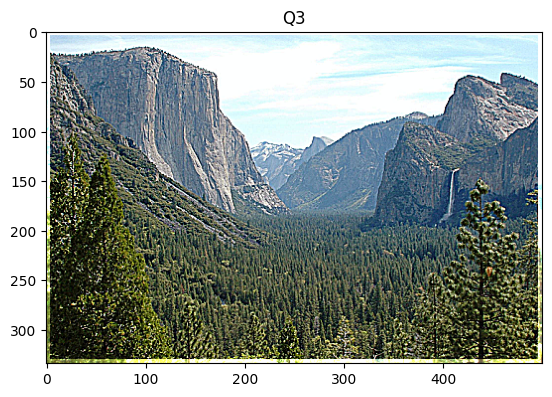

In [21]:
img_yosemite = Image.open('Yosemite.png') 
img_yosemite = np.array(img_yosemite).astype(np.uint8)
img_3 = SharpenImage(img_yosemite, sigma=1.0, alpha=5.0)
img_save(img_3, '4.png', 'Q3', show = True)

# Q4

In [22]:
def SobelImage(img_np):

    sobel_filterHorizontal = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_filterVertical = sobel_filterHorizontal.T
    
    row = sobel_filterHorizontal.shape[0]
    col = sobel_filterHorizontal.shape[1]

    Totalrows = img_np.shape[0]
    Totalcols = img_np.shape[1]

    arr = np.zeros((img_np.shape[0], img_np.shape[1]), dtype = np.float32)

    for i in range(row, Totalrows + 1):
        for j in range(col, Totalcols + 1):

            FocussedArray = img_np[range(i-row, i)][:, range(j-col, j)]
            arr[i-1-row//2][j-1-col//2] = (sobel_filterHorizontal*FocussedArray).sum() # because, -1 for index and i and j are the end of the row and col so -row//2 or -col//2 to place it in the middle
    
    img_filteredX = arr


    row = sobel_filterVertical.shape[0]
    col = sobel_filterVertical.shape[1]

    Totalrows = img_np.shape[0]
    Totalcols = img_np.shape[1]

    arr = np.zeros((img_np.shape[0], img_np.shape[1]), dtype = np.float32)

    for i in range(row, Totalrows + 1):
        for j in range(col, Totalcols + 1):
    
            FocussedArray = img_np[range(i-row, i)][:, range(j-col, j)]
            arr[i-1-row//2][j-1-col//2] = (sobel_filterVertical*FocussedArray).sum() # because, -1 for index and i and j are the end of the row and col so -row//2 or -col//2 to place it in the middle

    img_filteredY = arr

    magnitude = np.sqrt(img_filteredX**2 + img_filteredY**2)
    orientation = np.arctan2(img_filteredY, img_filteredX)
    return magnitude, orientation

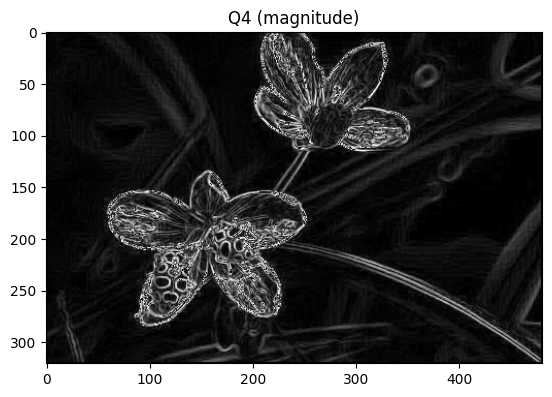

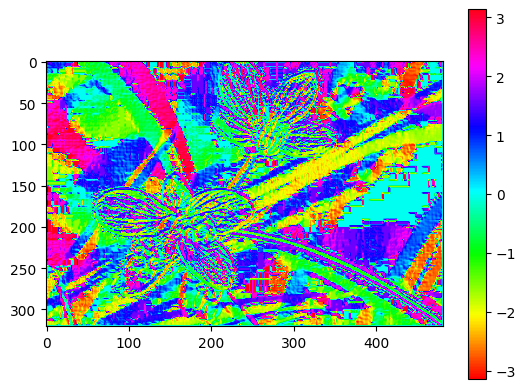

In [23]:
img_ladybug = Image.open('LadyBug.jpg').convert('L') 
img_ladybug = np.array(img_ladybug).astype(np.uint8)
magnitude, orientation = SobelImage(img_ladybug)
img_save(magnitude, '5a.png', 'Q4 (magnitude)', show = True, cmap = 'gray')

## orientation is represented in radians, ranging from -pi to +pi, better not normalizing or convert to uint8
plt.imshow(orientation, cmap = plt.cm.hsv) ## no astype(np.uint8) 
plt.colorbar()
plt.show()
plt.imsave('5b.png', orientation, cmap = plt.cm.hsv)

# Q5

In [24]:
def NNInterpolation(img_np, x, y):
    
    x = round(x)
    y = round(y)
    
    if img_np.shape[0] <= x or img_np.shape[1] <= y:
        pixel_value = 0
    else:
        pixel_value = img_np[x][y]

    return pixel_value

def BilinearInterpolation(img_np, x, y):
    
    a = x - np.floor(x)
    b = y - np.floor(y)
    
    if np.ceil(y) >= img_np.shape[1] or np.ceil(x) >= img_np.shape[0]:
        return 0
    
    pixel_value = (1-a) * (1-b) * img_np[int(np.floor(x))][int(np.floor(y))] + \
                          a * (1-b) * img_np[int(np.ceil(x))][int(np.floor(y))] + \
                          (1-a) * b * img_np[int(np.floor(x))][int(np.ceil(y))] + \
                          a * b * img_np[int(np.ceil(x))][int(np.ceil(y))]

    return pixel_value

def UpSampling(image, factor, interpolation):

    ## img_array.shape = (Height, Width)
    width_up = image.shape[1]*factor 
    height_up = image.shape[0]*factor

    img_upsampled = np.zeros((height_up, width_up, image.shape[2]), dtype = np.uint8)

    for i in range(height_up):
        for j in range(width_up):
            x = j / factor
            y = i / factor
            if interpolation == "Bilinear":
                img_upsampled[i][j] = BilinearInterpolation(image, x, y)
            else:
                img_upsampled[i][j] = NNInterpolation(image, x, y)
#     print(img_upsampled)
    return img_upsampled

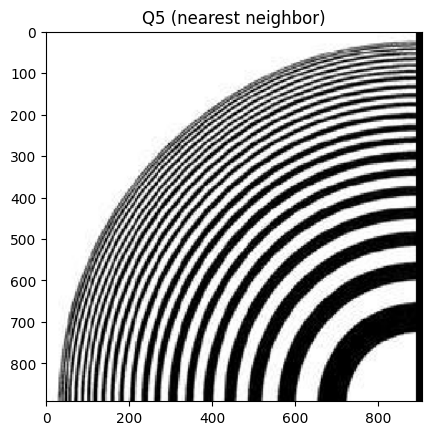

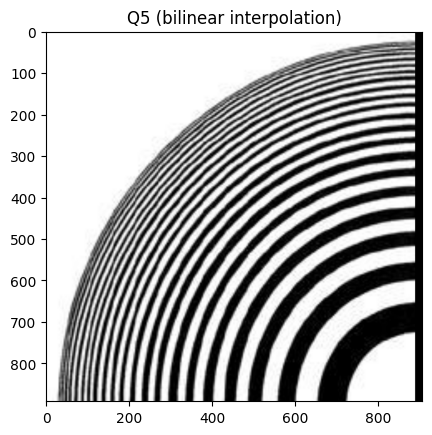

In [25]:
img_moire = Image.open('Moire_small.jpg')
img_moire = np.array(img_moire).astype(np.uint8)
# print(img_moire.shape)
moire_nn = UpSampling(img_moire, factor=4, interpolation="NN")
moire_bilinear = UpSampling(img_moire, factor=4, interpolation="Bilinear")
img_save(moire_nn, '6a.png', 'Q5 (nearest neighbor)', show = True)
img_save(moire_bilinear, '6b.png', 'Q5 (bilinear interpolation)', show = True)

# Q6


In [13]:
def BilateralImage(img_seattle, sigmaS, sigmaI):
    
    f_size = 2 * int(4 * sigmaS + 0.5) + 1 
    G_filter = createGaussianFilter(sigmaS)
    
    img_bilateral = np.zeros_like(img_seattle, dtype = np.float32)
    img_pad = np.pad(img_seattle, pad_width = (f_size-1)//2, mode = 'constant', constant_values = 0)

    for i in range(img_seattle.shape[0]):
        for j in range (img_seattle.shape[1]):
            
            img_sub = img_pad [i:i+f_size, j:j+f_size]
            intensitydiff = np.abs(img_sub - img_seattle[i,j]) 
            GaussianR = (1 / (np.sqrt((2 *np.pi * sigmaI ** 2)))) * np.exp(-(intensitydiff ** 2)/(2 * sigmaI ** 2))
            Bilateralfilter = (G_filter * GaussianR)
            Normalization = Bilateralfilter.sum()
            img_bilateral[i][j] = ((img_sub * Bilateralfilter).sum())/Normalization
            
    return img_bilateral


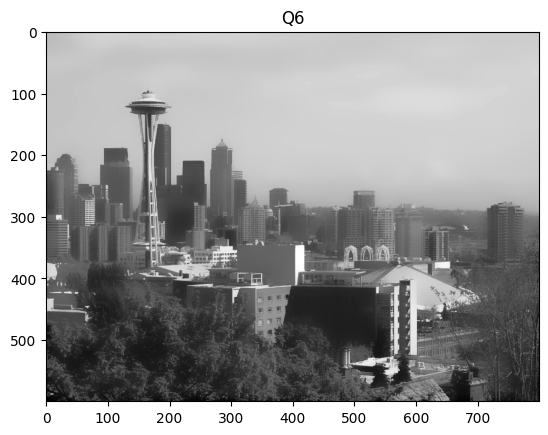

In [14]:
sigmaS = 10.0
sigmaI = 40.0
img_seattle1 = Image.open('Seattle.jpg').convert('L')
img_seattle1 = np.array(img_seattle1)
# print("IMH:", img_seattle1)
img_bilateral = BilateralImage(img_seattle1.astype(np.float32), sigmaS, sigmaI)
# print(img_bilateral.min())
# print(img_bilateral.max())
img_save(img_bilateral, 'bilateral.png', 'Q6', show = True, cmap = 'gray')

Written :

1) For Moire.jpg, set the sigma value to 8 and for Seattle.jpg, set the sigma value to 5.

2) No, because each time you rotate an image, you lose some pixels (data). Hence, when you rotate an image 20 times by 2 degrees, the amount of pixels lost will keep accumulating, so you will lose more data than when you rotate an image by 40 degrees.